In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import csv
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from keras import models, layers, optimizers, regularizers
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV, cross_val_predict
from keras import regularizers
%matplotlib inline

Using TensorFlow backend.


### Import datasets
- We will import train, test1 and test2 dataset
- Merge test1 and train dataset, in order to expend our train dataset

In [2]:
raw_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_train.csv', index_col=0)
raw_test_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test1.csv', index_col=0)
raw_test2_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test2.csv', index_col=0)
raw_test3_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test3.csv', index_col=0)
#raw_df = raw_df.append(raw_test_df)
raw_df.head(20)
raw_df.columns

Index(['addr_unit', 'building_id', 'bedrooms', 'bathrooms', 'size_sqft',
       'created_at', 'addr_street', 'addr_city', 'addr_zip', 'addr_lat',
       'addr_lon', 'bin', 'bbl', 'floor_count', 'year_built', 'min_to_subway',
       'has_doorman', 'has_elevator', 'has_fireplace', 'has_dishwasher',
       'is_furnished', 'has_gym', 'allows_pets', 'has_washer_dryer',
       'has_garage', 'has_roofdeck', 'has_concierge', 'has_pool', 'has_garden',
       'has_childrens_playroom', 'rent', 'no_fee', 'description',
       'neighborhood', 'borough', 'unit', 'floornumber', 'line'],
      dtype='object')

## Data Explore

In [3]:
raw_df.describe()

,building_id,bedrooms,bathrooms,size_sqft,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,...,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,floornumber
count,1.200000e+04,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,1.199900e+04,1.200000e+04,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,10723.000000
mean,1.529133e+06,1.657667,1.239500,850.465750,10682.779667,40.727507,-73.956837,2.370093e+06,2.287120e+09,10.266608,...,0.271667,0.170000,0.264083,0.208583,0.073167,0.132083,0.090500,3605.762917,0.490000,6.182738
std,4.301123e+06,1.079771,0.560208,515.773101,593.370964,0.053241,0.043024,1.242919e+06,1.202105e+09,12.019787,...,0.444837,0.375648,0.440862,0.406313,0.260421,0.338595,0.286909,2897.069446,0.499921,7.671545
min,7.300000e+01,0.000000,0.000000,0.000000,10001.000000,40.573898,-74.141570,1.000000e+06,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1250.000000,0.000000,0.000000
25%,6.209200e+04,1.000000,1.000000,610.000000,10023.000000,40.693256,-73.986076,1.052139e+06,1.011220e+09,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2250.000000,0.000000,2.000000
50%,2.495815e+05,2.000000,1.000000,800.000000,11103.000000,40.729028,-73.961700,3.019358e+06,3.006580e+09,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2900.000000,0.000000,3.000000
75%,8.225132e+05,2.000000,1.000000,1000.000000,11218.000000,40.764599,-73.936663,3.326098e+06,3.050580e+09,12.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3900.000000,1.000000,6.000000
max,1.877210e+07,8.000000,20.000000,10000.000000,11694.000000,40.909842,-73.730550,5.158986e+06,5.010640e+09,90.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50000.000000,1.000000,78.000000


In [4]:
raw_df.shape

(12000, 38)

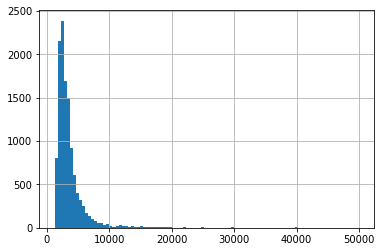

In [5]:
raw_df['rent'].hist(bins=100)

### Seperate all features into continuous, categorical and binary features.

For those none relatived features as below, we have excluded them from the features grouping: 
- addr_unit: no relationship
- building_id: no relationship
- addr_lat: hard to analyze latitude
- addr_lon: hard to analyze longtitude
- bin: need to wait for external dataset
- bbl: need to wait for external dataset
- description: hard to build a NLP model
- unit: no relationship


In [6]:
continuous_features =['bathrooms','bedrooms','size_sqft','floor_count','year_built','min_to_subway','floornumber' ]
caterigal_features =['addr_street','addr_city','addr_zip','neighborhood','borough','line' ]
binary_features = ['has_doorman', 'has_elevator', 'has_fireplace', 'has_dishwasher','is_furnished', 'has_gym', 'allows_pets', 
                   'has_washer_dryer','has_garage', 'has_roofdeck', 'has_concierge', 'has_pool', 'has_garden',
                   'has_childrens_playroom', 'no_fee', ]

## Import external dataset from Internal Revenue Service
 - We will import the 2017 individual income Tax statistic dataset from IRS website(https://www.irs.gov/pub/irs-soi/17zpallagi.csv).
 - We will expend a new feature: **average_income** based on zipcode to our raw dataset 

In [7]:
raw_income_data=pd.read_csv('https://www.irs.gov/pub/irs-soi/17zpallagi.csv', index_col=0)
raw_income_data.columns

Index(['STATE', 'zipcode', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'ELF',
       'CPREP', 'PREP',
       ...
       'N85300', 'A85300', 'N11901', 'A11901', 'N11900', 'A11900', 'N11902',
       'A11902', 'N12000', 'A12000'],
      dtype='object', length=152)

In [8]:
raw_income_data.describe()

,zipcode,agi_stub,N1,mars1,MARS2,MARS4,ELF,CPREP,PREP,DIR_DEP,...,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
count,166537.000000,166537.000000,1.665370e+05,1.665370e+05,1.665370e+05,166537.000000,1.665370e+05,166537.000000,1.665370e+05,1.665370e+05,...,166537.000000,1.665370e+05,166537.000000,1.665370e+05,1.665370e+05,1.665370e+05,1.665370e+05,1.665370e+05,166537.000000,1.665370e+05
mean,48870.221668,3.499883,1.797506e+03,8.568076e+02,6.466075e+02,257.395354,1.595375e+03,109.165711,9.565737e+02,1.115313e+03,...,52.247849,2.652260e+02,366.565508,2.075837e+03,1.385102e+03,4.864975e+03,1.349381e+03,3.932834e+03,43.103875,8.790301e+02
std,27140.457939,1.707903,3.682065e+04,2.157115e+04,1.180901e+04,6579.521856,3.234179e+04,2546.536828,1.996698e+04,2.347348e+04,...,2663.659358,1.535593e+04,6891.242958,6.608186e+04,2.947749e+04,1.012458e+05,2.909491e+04,7.693938e+04,947.324343,4.399491e+04
min,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,27030.000000,2.000000,7.000000e+01,0.000000e+00,4.000000e+01,0.000000,6.000000e+01,0.000000,4.000000e+01,4.000000e+01,...,0.000000,0.000000e+00,20.000000,2.100000e+01,5.000000e+01,1.580000e+02,4.000000e+01,1.410000e+02,0.000000,0.000000e+00
50%,48876.000000,3.000000,2.500000e+02,7.000000e+01,1.100000e+02,20.000000,2.200000e+02,0.000000,1.500000e+02,1.400000e+02,...,0.000000,0.000000e+00,60.000000,1.550000e+02,1.800000e+02,6.220000e+02,1.700000e+02,5.480000e+02,0.000000,0.000000e+00
75%,70601.000000,5.000000,1.020000e+03,3.400000e+02,3.800000e+02,90.000000,9.100000e+02,60.000000,5.600000e+02,5.900000e+02,...,0.000000,0.000000e+00,220.000000,6.870000e+02,7.400000e+02,2.484000e+03,7.100000e+02,2.207000e+03,30.000000,6.400000e+01
max,99999.000000,6.000000,5.824360e+06,4.130490e+06,1.757700e+06,982390.000000,4.980210e+06,475240.000000,3.387570e+06,3.233490e+06,...,763140.000000,4.031847e+06,890950.000000,1.750126e+07,4.598480e+06,1.667374e+07,4.561540e+06,9.443931e+06,186110.000000,1.056186e+07


### Income Dataset Description 
This dataset comes from the IRS website's 2017 ZIP Code Data (SOI) about Individual Income Tax Statistics.
According to the documentation's overview,the Statistics of Income (SOI) Division’s ZIP code data is tabulated using individual income tax returns (Forms 1040) filed with the Internal Revenue Service (IRS) during the 12-month period, January 1, 2018 to December 31, 2018.
The original dataset contains many income and Tax Items, we only keep the ones that are relevant: 
- STATEFIPS:The State Federal Information Processing System (FIPS) code
- STATE: The State associated with the ZIP code
- ZIPCODE: 5-digit Zip code
- agi_stub: Size of adjusted gross income
- N1: Total number of returns
- A02650: Number of returns with total income

Our goal is to find the average income of each zipcode.

### Clean the raw income data and rename feature

In [9]:
raw_income_data = raw_income_data.loc[raw_income_data['STATE']=='NY']
raw_income_data.rename(columns = {'N1':'total_returns', 'A02650':'total_income'}, inplace = True) 
raw_income_data = raw_income_data[['STATE','zipcode','agi_stub','total_returns', 'total_income']]
raw_income_data = raw_income_data.loc[raw_income_data['zipcode']<99999]
raw_income_data = raw_income_data.loc[raw_income_data['zipcode']>0]


### Function to calculate the average income by zip code
Each zip code has 6 different sizes of adjusted gross income which means we have 6 different number of total returns and total income for one zip code.
By using the np.where and sum function, we can obtain the sum of income and sum of returns for each zip code. The income of the original dataset was in thousands of dollar so we need to multiply the sum of income by 1000 and then find the average. Since some zip code was not in the original set, we ingore those average that is NaN and only write the meaningful averages to csv file for future use.

- Calculate average income 
- Export to ny_income_2017.csv for storage
- For next time, no need to import the raw_income_dataset again

In [10]:
average_income = pd.DataFrame({'addr_zip':[],'zip_average_income':[]})

def calculate_avg_income():
    global average_income
    for zipcode in range(10001, 14906):
        current_sum=np.where(raw_income_data['zipcode']==zipcode, raw_income_data['total_income'],0).sum()
        current_returns=np.where(raw_income_data['zipcode']==zipcode, raw_income_data['total_returns'],0).sum() 
        if(current_returns <=0 or current_sum<=0):
            continue
        avg_income=(current_sum*1000)/current_returns
        new_row={'addr_zip':zipcode,'zip_average_income':avg_income}
        average_income=average_income.append(new_row,ignore_index=True)           
calculate_avg_income()
average_income.head(5)

,addr_zip,zip_average_income
0,10001.0,183859.908735
1,10002.0,59669.401750
2,10003.0,306277.962003
3,10004.0,385265.306122
4,10005.0,391201.520270


 - We realize that the income dataset is missing all income data between zipcode 11239 - 11354, we will take an averge of zipcode income for 11239 and 11354 to replace any zipcode income in between 
 - In our training and testing dataset, only the zipcode income 11249 is missing

In [11]:
print(list(set(raw_df['addr_zip']) - set(average_income['addr_zip'])))
print(list(set(raw_test_df['addr_zip']) - set(average_income['addr_zip'])))

[11249]
[11249]


**Insert a new row for zipcode income 11249 into the average_income dataframe**

In [12]:
avg_income = (average_income.loc[(average_income['addr_zip']==11239)].iloc[0]['zip_average_income'] +
             average_income.loc[(average_income['addr_zip']==11354)].iloc[0]['zip_average_income'])/2
new_row = {'addr_zip':11249,'zip_average_income':avg_income}
average_income=average_income.append(new_row,ignore_index=True)  

### Merge the raw train  dataset with the income dataset by addr_zip

In [13]:
raw_test2_df=raw_test2_df.reset_index().merge(average_income, how="left",on='addr_zip').set_index('rental_id')
raw_df=raw_df.reset_index().merge(average_income, how="left",on='addr_zip').set_index('rental_id')
raw_test_df=raw_test_df.reset_index().merge(average_income, how="left",on='addr_zip').set_index('rental_id')
raw_test3_df=raw_test3_df.reset_index().merge(average_income, how="left",on='addr_zip').set_index('rental_id')

### Find zip_average_income and rent cooleration

In [14]:
continuous_features.append('zip_average_income')

In [15]:
continuous_df = raw_df[['zip_average_income','rent']]
continuous_df.corr()['rent'][:-1]

zip_average_income    0.398523
Name: rent, dtype: float64

**The correlation between zip_average_income and rent is 0.393228, it is good enough to consider as a important feature that might impact the rent**

## Import external Unemployment dataset from Zipatlas
 - dataset source (http://zipatlas.com/us/ny/zip-code-comparison/unemployment-rate.htm)
 - The site only contains the data table, so the data were manually copied to csv file
 - People tend to stay in the areas that has more working oppurnites,which means the renting market is busy, therefore the areas with high underemployemnt rate are more likely to have lower rent, however, since we are working with zipcode, there are zipcodes that have only a few people that shift the result, so our team will need to evalue how will the overall model change.


In [16]:
unemployment_df = pd.read_csv('./data/Unemployment_Rate_NY_by_zipcode.csv')
unemployment_df.columns


Index(['Zip Code', 'Location', 'City', 'Population', '% Unemployment Rate',
       'National Rank'],
      dtype='object')

In [17]:
# We only care about zipcode and % Unemployment Rate
unemployment_df = unemployment_df[['Zip Code','% Unemployment Rate']]
unemployment_df.rename(columns={'Zip Code':'addr_zip','% Unemployment Rate':"zip_unemployment_rate"}, inplace=True)
unemployment_df.head(10)

,addr_zip,zip_unemployment_rate
0,14614,75.47%
1,12970,67.58%
2,11430,57.03%
3,12742,48.33%
4,14068,38.20%
5,12733,37.53%
6,12786,33.63%
7,14478,28.29%
8,10474,27.37%
9,13202,26.84%


In [18]:
# Convert the zip_unemployment_rate to float 
unemployment_df['zip_unemployment_rate'] = unemployment_df['zip_unemployment_rate'].str.replace(r'.%$', '')
unemployment_df['zip_unemployment_rate'] = unemployment_df['zip_unemployment_rate'].astype(float)

- We will merge the raw train dataset with the unemployment_df dataset by addr_zip

In [19]:
raw_df=raw_df.reset_index().merge(unemployment_df, how="left",on='addr_zip').set_index('rental_id')
raw_test_df=raw_test_df.reset_index().merge(unemployment_df, how="left",on='addr_zip').set_index('rental_id')
raw_test2_df=raw_test2_df.reset_index().merge(unemployment_df, how="left",on='addr_zip').set_index('rental_id')
raw_test3_df=raw_test3_df.reset_index().merge(unemployment_df, how="left",on='addr_zip').set_index('rental_id')
# raw_df.head(5)

In [20]:
print("Missing data for the newly added zip_unemployment_rate column is:",raw_df['zip_unemployment_rate'].isna().sum())

Missing data for the newly added zip_unemployment_rate column is: 338


We will try to replace the missing data with the mean of the unemployment rates

In [21]:
raw_df['zip_unemployment_rate'].fillna(raw_df['zip_unemployment_rate'].mean(), inplace=True)
raw_test_df['zip_unemployment_rate'].fillna(raw_test_df['zip_unemployment_rate'].mean(), inplace=True)
raw_test2_df['zip_unemployment_rate'].fillna(raw_test2_df['zip_unemployment_rate'].mean(), inplace=True)
raw_test3_df['zip_unemployment_rate'].fillna(raw_test3_df['zip_unemployment_rate'].mean(), inplace=True)
raw_df['zip_unemployment_rate'].isna().sum()

0

### Find zip_unemployment_rate and rent cooleration

In [22]:
continuous_features.append('zip_unemployment_rate')

In [23]:
continuous_df = raw_df[['zip_unemployment_rate','rent']]
continuous_df.corr()['rent'][:-1]

zip_unemployment_rate   -0.165366
Name: rent, dtype: float64

- The correlation between zip_unemployment_rate and rent is  -0.167267.
- It clearly shows that the unemployment rate and rent has negative correlation, as we have stated, area with higher unemployment rate tend to have a lower rent, but the relationship is not that significant comparing to the average income

## Import external Population dataset from NYC OpenData
 - dataset source (https://data.cityofnewyork.us/City-Government/New-York-City-Population-By-Neighborhood-Tabulatio/swpk-hqdp).
 - This population dataset from NYC OpenData is based on neighbourhood, we can append neighbourhood_population to eash row

In [24]:
# import dataset
poulation_df = pd.read_csv('./data/NYC_Population.csv', index_col=0)

In [25]:
# dataset contain 2010 and 2000 datas, we only take 2010 data
poulation_df = poulation_df[poulation_df['Year']==2010]
poulation_df = poulation_df[['NTA Name','Population']]
poulation_df.rename(columns={'NTA Name':'neighborhood','Population':"neighborhood_population"}, inplace=True)
poulation_df.head(10)

,neighborhood,neighborhood_population
Borough,,
Bronx,Claremont-Bathgate,31078
Bronx,Eastchester-Edenwald-Baychester,34517
Bronx,Bedford Park-Fordham North,54415
Bronx,Belmont,27378
Bronx,Bronxdale,35538
Bronx,West Farms-Bronx River,35011
Bronx,Soundview-Castle Hill-Clason Point-Harding Park,53686
Bronx,Pelham Bay-Country Club-City Island,26583
Bronx,Co-Op City,43752


In [26]:
# join the train datasets with population dataset
raw_df=raw_df.reset_index().merge(poulation_df, how="left",on='neighborhood').set_index('rental_id')
raw_test_df=raw_test_df.reset_index().merge(poulation_df, how="left",on='neighborhood').set_index('rental_id')
raw_test2_df=raw_test2_df.reset_index().merge(poulation_df, how="left",on='neighborhood').set_index('rental_id')
raw_test3_df=raw_test3_df.reset_index().merge(poulation_df, how="left",on='neighborhood').set_index('rental_id')

- We join two datasets by using 'neighborhood', but some of the 'neighborhood' names are not exact the same
- For those neighborhood name can't find in the population_df, we try to look for substring match

In [27]:

def joinPopulation(df):
    for neighborhood in pd.unique(df.neighborhood.values):
        if neighborhood != neighborhood:
            continue
        population = df.loc[df['neighborhood'] == neighborhood,'neighborhood_population'].mean()
        if population == population:
            continue
        match_rows = poulation_df['neighborhood'].str.match(neighborhood)
        mean_population =poulation_df[match_rows]['neighborhood_population'].mean()
        df.loc[df['neighborhood'] == neighborhood, 'neighborhood_population'] = mean_population
joinPopulation(raw_df)
joinPopulation(raw_test2_df)

In [28]:
raw_df['neighborhood_population'].fillna(raw_df['neighborhood_population'].mean(), inplace=True)
raw_test_df['neighborhood_population'].fillna(raw_test_df['neighborhood_population'].mean(), inplace=True)
raw_test2_df['neighborhood_population'].fillna(raw_test2_df['neighborhood_population'].mean(), inplace=True)
raw_test3_df['neighborhood_population'].fillna(raw_test3_df['neighborhood_population'].mean(), inplace=True)

## Import external housing sale price dataset
 - dataset source (https://www.kaggle.com/new-york-city/nyc-property-sales).

In [29]:
sale_df =  pd.read_csv('./data/sale_price.csv')
sale_df.columns

Index(['ave_sale_price', 'addr_zip'], dtype='object')

In [30]:
raw_test2_df=raw_test2_df.reset_index().merge(sale_df, how="left",on='addr_zip').set_index('rental_id')
raw_df=raw_df.reset_index().merge(sale_df, how="left",on='addr_zip').set_index('rental_id')
raw_test_df=raw_test_df.reset_index().merge(sale_df, how="left",on='addr_zip').set_index('rental_id')
raw_test3_df=raw_test3_df.reset_index().merge(sale_df, how="left",on='addr_zip').set_index('rental_id')

## Import external median estimated rental values dataset from Zillow
 - dataset source (https://www.zillow.com/research/data/).
 - this dataset provides a smoothed measure of the median estimated market rate rent across a given region and housing type

In [31]:
rv_df =  pd.read_csv('./data/Zip_Zri_AllHomesPlusMultifamily_Summary.csv', encoding = "ISO-8859-1")
rv_df.columns

Index(['Date', 'RegionName', 'State', 'Metro', 'County', 'City', 'SizeRank',
       'Zri', 'MoM', 'QoQ', 'YoY', 'ZriRecordCnt'],
      dtype='object')

As we can see from all the columns, the only columns we will need are 
- RegionName : which in our case is the zipcode 
- Zri : which stands for Zillow Rent Index,it is a smoothed measure of the median estimated market rate rent across a given region. 

Therefore we can drop all other columns and also, we should frist drop all the rows that are not in the state of NY

In [32]:
rv_df = rv_df[rv_df['State']=='NY']
rv_df = rv_df[['RegionName','Zri']]
rv_df.rename(columns={'RegionName':'addr_zip','Zri':"estimated_rental_value"}, inplace=True)
# rv_df.head(10)

We can check if there is any missing data just in case

In [33]:
rv_df.isna().sum()

addr_zip                  0
estimated_rental_value    0
dtype: int64

In [34]:
raw_df=raw_df.reset_index().merge(rv_df, how="left",on='addr_zip').set_index('rental_id')
raw_test_df=raw_test_df.reset_index().merge(rv_df, how="left",on='addr_zip').set_index('rental_id')
raw_test2_df=raw_test2_df.reset_index().merge(rv_df, how="left",on='addr_zip').set_index('rental_id')
raw_test3_df=raw_test3_df.reset_index().merge(rv_df, how="left",on='addr_zip').set_index('rental_id')
# raw_df.head(5)

In [35]:
print("Missing data for the newly added estimated_rental_value column is:",raw_df['estimated_rental_value'].isna().sum())

Missing data for the newly added estimated_rental_value column is: 526


We will use the mean of the estimate_rental_value to fill the missing value

In [36]:
raw_df['estimated_rental_value'].fillna(raw_df['estimated_rental_value'].mean(), inplace=True)
raw_test_df['estimated_rental_value'].fillna(raw_test_df['estimated_rental_value'].mean(), inplace=True)
raw_test2_df['estimated_rental_value'].fillna(raw_test2_df['estimated_rental_value'].mean(), inplace=True)
raw_test3_df['estimated_rental_value'].fillna(raw_test3_df['estimated_rental_value'].mean(), inplace=True)

In [37]:
raw_df['estimated_rental_value'].isna().sum()

0

# Data Cleaning


### Handling missing data
In order to handle missing data in this dataset, we frist find and count all the null values.

In [38]:
raw_df.isna().sum()

addr_unit                    91
building_id                   0
bedrooms                      0
bathrooms                     0
size_sqft                     0
created_at                    0
addr_street                   0
addr_city                     0
addr_zip                      0
addr_lat                      0
addr_lon                      0
bin                           1
bbl                           0
floor_count                   0
year_built                  403
min_to_subway               126
has_doorman                   0
has_elevator                  0
has_fireplace                 0
has_dishwasher                0
is_furnished                  0
has_gym                       0
allows_pets                   0
has_washer_dryer              0
has_garage                    0
has_roofdeck                  0
has_concierge                 0
has_pool                      0
has_garden                    0
has_childrens_playroom        0
rent                          0
no_fee  

As we can see from the result,there are missing data appearing on: 
- addr_unit
- bin 
- year_built 
- min_to_subway 
- description 
- neighborhood 
- unit 
- floornumber 
- line 

Continuous features floornumber, year_built and min_to_subway has impact on the rent, so we will fill with mode or mean. For catagorigious feature neighborhood, we will not use it in building model, because it has too many possible values.

In [39]:
train_df = raw_df
test_df = raw_test_df
test2_df = raw_test2_df
test3_df = raw_test3_df

train_df['floornumber'].fillna(train_df['floornumber'].mode()[0], inplace=True)
test_df['floornumber'].fillna(test_df['floornumber'].mode()[0], inplace=True)
test2_df['floornumber'].fillna(test2_df['floornumber'].mode()[0], inplace=True)
test3_df['floornumber'].fillna(test3_df['floornumber'].mode()[0], inplace=True)

train_df['min_to_subway'].fillna(train_df['min_to_subway'].mean(), inplace=True)
test_df['min_to_subway'].fillna(test_df['min_to_subway'].mode()[0], inplace=True)
test2_df['min_to_subway'].fillna(test2_df['min_to_subway'].mean(), inplace=True)
test3_df['min_to_subway'].fillna(test3_df['min_to_subway'].mean(), inplace=True)

train_df['year_built'].fillna(train_df['year_built'].mean(), inplace=True)
test_df['year_built'].fillna(test_df['year_built'].mode()[0], inplace=True)
test2_df['year_built'].fillna(test2_df['year_built'].mean(), inplace=True)
test3_df['year_built'].fillna(test3_df['year_built'].mean(), inplace=True)

print("original shape of dataset:",raw_df.shape)
print("shape of dataset after handling missing data, should stay the same:",train_df.shape)

original shape of dataset: (12000, 43)
shape of dataset after handling missing data, should stay the same: (12000, 43)


## Remove outliers

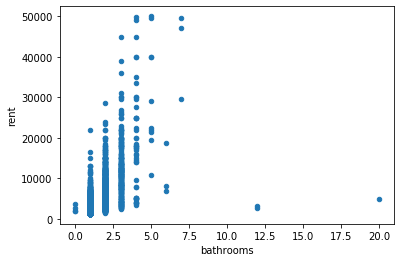

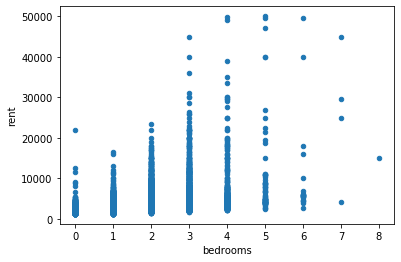

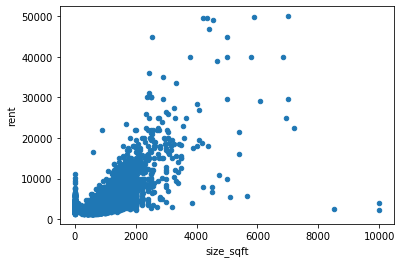

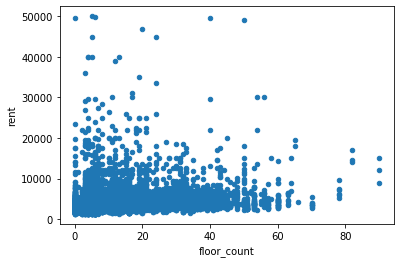

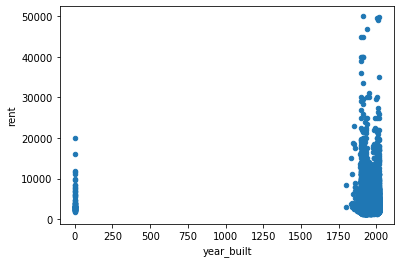

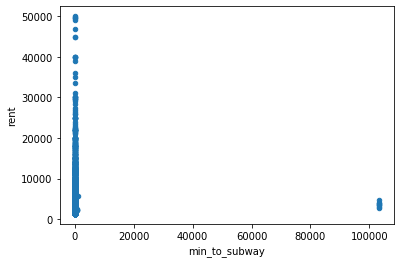

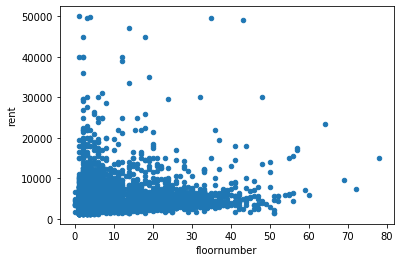

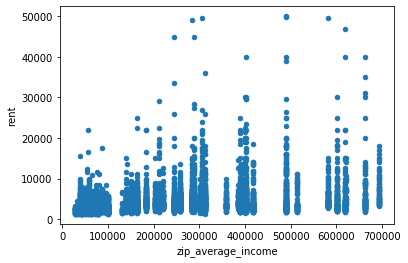

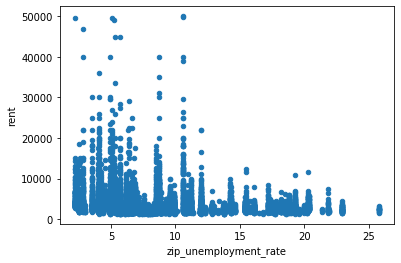

In [40]:
for feature in continuous_features:
    train_df.plot.scatter(feature, 'rent')

In [41]:
train_df[train_df['rent']>40000].count()

addr_unit                  8
building_id                8
bedrooms                   8
bathrooms                  8
size_sqft                  8
created_at                 8
addr_street                8
addr_city                  8
addr_zip                   8
addr_lat                   8
addr_lon                   8
bin                        8
bbl                        8
floor_count                8
year_built                 8
min_to_subway              8
has_doorman                8
has_elevator               8
has_fireplace              8
has_dishwasher             8
is_furnished               8
has_gym                    8
allows_pets                8
has_washer_dryer           8
has_garage                 8
has_roofdeck               8
has_concierge              8
has_pool                   8
has_garden                 8
has_childrens_playroom     8
rent                       8
no_fee                     8
description                8
neighborhood               8
borough       

**drop size_sqrt = 0 for now, since there are 713 rows, might replace with mode when creating models**

In [43]:
def remove_outliers(train_df, feature, low_value, high_value):
    print(feature, ': ', train_df.shape)
    train_df = train_df[train_df[feature]>low_value]
    train_df = train_df[train_df[feature]<=high_value]
    train_df.reset_index(drop=True,inplace=True)
    print(feature, ': ', train_df.shape)
    return train_df

train_df = remove_outliers(train_df, 'rent', 0, 40000)
train_df = remove_outliers(train_df, 'bathrooms', 0, 12)
train_df = remove_outliers(train_df, 'size_sqft', 0, 10000)
train_df = remove_outliers(train_df, 'year_built', 1700, 2019)
train_df = remove_outliers(train_df, 'min_to_subway', 0, 60)
train_df = remove_outliers(train_df, 'floornumber', 0, 60)

train_df['year_built'] = 2018 - train_df['year_built'].astype(int)
test_df['year_built'] = 2018 - test_df['year_built'].astype(int)
test2_df['year_built'] = 2018 - test2_df['year_built'].astype(int)
test3_df['year_built'] = 2018 - test3_df['year_built'].astype(int)

rent :  (12000, 43)
rent :  (11992, 43)
bathrooms :  (11992, 43)
bathrooms :  (11987, 43)
size_sqft :  (11987, 43)
size_sqft :  (11149, 43)
year_built :  (11149, 43)
year_built :  (11082, 43)
min_to_subway :  (11082, 43)
min_to_subway :  (10954, 43)
floornumber :  (10954, 43)
floornumber :  (10940, 43)


### Encode categorical feature and drop useless features

In [44]:
boroughs = np.array(train_df['borough'].unique())

for borough in boroughs:
    train_df[borough] = train_df['borough'].apply(lambda x : int(x == borough))
    test_df[borough] = test_df['borough'].apply(lambda x : int(x == borough))
    test2_df[borough] = test2_df['borough'].apply(lambda x : int(x == borough))
    test3_df[borough] = test3_df['borough'].apply(lambda x : int(x == borough))

features_notNeed = ['addr_unit', 'building_id', 'created_at', 'addr_street', 'addr_city', 'addr_zip', 'bin', 'bbl', 'description', \
                    'neighborhood', 'unit', 'borough', 'line']

train_df = train_df.drop(features_notNeed, axis=1)

### Use pair coorelation for continuous features

In [45]:
continuous_df = train_df[continuous_features+['rent']]
continuous_df.corr()['rent'][:-1]

bathrooms                0.640694
bedrooms                 0.356034
size_sqft                0.687094
floor_count              0.260418
year_built              -0.108018
min_to_subway           -0.085295
floornumber              0.246378
zip_average_income       0.425890
zip_unemployment_rate   -0.172119
Name: rent, dtype: float64

### Check coorelation for binary features

In [46]:
train_df[binary_features+['rent']].corr()['rent'][:-1]
coor_results= []

for feature in binary_features:
  df = raw_df.groupby([feature]).aggregate(['mean'])['rent']
  df[feature]= df.index
  coor_results.append(df.corr().iloc[0][1])
coor_df = pd.DataFrame({'Coorelation': coor_results,'Feature':binary_features})
coor_df


,Coorelation,Feature
0,1.0,has_doorman
1,1.0,has_elevator
2,1.0,has_fireplace
3,1.0,has_dishwasher
4,1.0,is_furnished
5,1.0,has_gym
6,1.0,allows_pets
7,1.0,has_washer_dryer
8,1.0,has_garage
9,1.0,has_roofdeck


As we can see in the correlation table, all binary features highly affected the rents. When we build the models, we should include all binary features.

# Build Models
 - We will be using cross validation to evaluate the performances of all our modles,and then deciding which should be the most suitable one, thus we will first create a function called get_cv_results to obtain the cv_performance.
 - we will try 5 different basic categorical models:`multiple regression, decision tree, random froest, Gradient Boosting Regression and Neural Network`

In [47]:
#md_df = shuffle(train_df).reset_index(drop=True)
features = list(train_df.columns)
features.remove('rent')
k_fold = KFold(n_splits=10)

In [48]:
def get_cv_results(regressor):
    
    results = []
    for train, test in k_fold.split(train_df):
        regressor.fit(train_df.loc[train, features], train_df.loc[train, 'rent'])
        y_predicted = regressor.predict(train_df.loc[test, features])
        accuracy = mean_squared_error(train_df.loc[test, 'rent'], y_predicted)
        results.append(accuracy)

    return np.mean(results), np.std(results)

def get_test_result(regressor):
    regressor.fit(train_df[features], train_df['rent'])
    y_predicted = regressor.predict(test_df[features])
    accuracy = mean_squared_error(test_df['rent'], y_predicted)
    return accuracy

### Radnom Forest Model

In [49]:
rforest = RandomForestRegressor(
    random_state=11, 
    max_depth=10,
    n_estimators=200
)


In [50]:
#get_cv_results(rforest)

In [51]:
get_test_result(rforest)

1763913.7963390597

Now let's see how each features affected this model by checking the feature_importances

In [52]:
rforest.fit(train_df[features], train_df['rent'])  
for feature,score in sorted(zip(features,rforest.feature_importances_), key=lambda x:x[1], reverse=True):
    print(feature, ' ', score)

size_sqft   0.5439052194610208
zip_average_income   0.1594457441237323
bathrooms   0.10752272887127175
estimated_rental_value   0.06599815017926904
addr_lon   0.013383038877882971
bedrooms   0.011737695317676045
year_built   0.011627808693078617
floornumber   0.010331776867014163
min_to_subway   0.009679897529332439
ave_sale_price   0.009663151360778185
addr_lat   0.009659036179539924
floor_count   0.00884564437525413
has_gym   0.006391893881072813
zip_unemployment_rate   0.004815052357133212
has_dishwasher   0.0033434387869756784
has_washer_dryer   0.0030426487561268896
has_garden   0.0030421782447075645
is_furnished   0.0030355850860898934
has_roofdeck   0.002179375594743553
has_elevator   0.0018782917883513306
neighborhood_population   0.0017588123541198708
has_concierge   0.001683430972829461
no_fee   0.001578351034759349
has_doorman   0.001181398182817028
has_pool   0.0009271799455887582
allows_pets   0.0009182829119736733
has_childrens_playroom   0.0008746216925613864
has_firepla

### Multiple Regression
 - Multiple regression is an extension of simple linear regression. It is used when we want to predict the value of a variable based on the value of two or more other variables
 - We will based on p value to choose significant variables(p<0.1)
 

In [53]:
mul_reg_features = features[:]
x = train_df[features] 
y = train_df['rent']
est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     855.0
Date:                Sat, 07 Dec 2019   Prob (F-statistic):               0.00
Time:                        00:46:04   Log-Likelihood:                -95083.
No. Observations:               10940   AIC:                         1.902e+05
Df Residuals:                   10906   BIC:                         1.905e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
bedrooms                  119.6166     18.760      6.376      0.000      82.843     156.390
bathrooms                1133.7673     36.229     31.295      0.000    1062.753    1204.782
size_sqft                   2.8032      0.045     61.770      0.000       2.714       2.892
addr_lat                 3140.3324    467.737      6.714      0.000    2223.482    4057.182
addr_lon                -4105.6763    584.281     -7.027      0.000   -5250.974   -2960.379
floor_count                -9.3134      2.363     -3.942      0.000     -13.945      -4.682
year_built                 -0.3567      0.490     -0.727      0.467      -1.318       0.604
min_to_subway             -20.4178      3.962     -5.153      0.000     -28.185     -12.651
has_doorman               111.1803     51.691      2.151      0.032       9.856     212.504
has_elevator              325.5354     42.083      7.735      0.000     243.044     408.026
has_fireplace             510.0940     75.165      6.786      0.000     362.757     657.431
has_dishwasher           -178.1552     31.948     -5.576      0.000    -240.779    -115.531
is_furnished              672.8321     83.062      8.100      0.000     510.015     835.649
has_gym                   307.0011     52.295      5.871      0.000     204.494     409.508
allows_pets               111.1818     30.963      3.591      0.000      50.488     171.876
has_washer_dryer          335.7516     36.166      9.284      0.000     264.860     406.643
has_garage                -89.3494     43.358     -2.061      0.039    -174.340      -4.359
has_roofdeck               57.3032     40.052      1.431      0.153     -21.207     135.813
has_concierge             231.8750     53.649      4.322      0.000     126.714     337.036
has_pool                   74.9582     63.714      1.176      0.239     -49.933     199.849
has_garden                -20.0382     43.418     -0.462      0.644    -105.145      65.069
has_childrens_playroom     39.5591     59.096      0.669      0.503     -76.280     155.398
no_fee                   -131.8493     31.729     -4.156      0.000    -194.043     -69.655
floornumber                21.9317      2.935      7.472      0.000      16.179      27.685
zip_average_income          0.0008      0.000      4.613      0.000       0.000       0.001
zip_unemployment_rate     -30.5967      4.344     -7.043      0.000     -39.112     -22.081
neighborhood_population    -0.0030      0.001     -4.749      0.000      -0.004      -0.002
ave_sale_price           1.792e-05   9.87e-06      1.815      0.070   -1.43e-06    3.73e-05
estimated_rental_value      0.5049      0.025     20.126      0.000       0.456       0.554
Brooklyn                -4.337e+05   5.12e+04     -8.470      0.000   -5.34e+05   -3.33e+05
Manhattan               -4.336e+05   5.12e+04  

- As we can see, variables has_garden and year_built have P value > 0.1
- After we remove these two variables, all P values are < 0.1

In [54]:
mul_reg_features.remove('has_garden')
mul_reg_features.remove('year_built')
x = train_df[mul_reg_features] 
y = train_df['rent']
est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     910.2
Date:                Sat, 07 Dec 2019   Prob (F-statistic):               0.00
Time:                        00:46:09   Log-Likelihood:                -95084.
No. Observations:               10940   AIC:                         1.902e+05
Df Residuals:                   10908   BIC:                         1.905e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
bedrooms                  119.3989     18.748      6.369      0.000      82.649     156.148
bathrooms                1136.0321     36.120     31.452      0.000    1065.231    1206.833
size_sqft                   2.7986      0.045     62.184      0.000       2.710       2.887
addr_lat                 3132.9238    467.516      6.701      0.000    2216.508    4049.340
addr_lon                -4087.3033    583.624     -7.003      0.000   -5231.312   -2943.295
floor_count                -9.0023      2.330     -3.863      0.000     -13.570      -4.435
min_to_subway             -20.3102      3.937     -5.159      0.000     -28.027     -12.593
has_doorman               112.1323     51.648      2.171      0.030      10.892     213.372
has_elevator              331.3493     41.424      7.999      0.000     250.151     412.547
has_fireplace             506.2097     75.021      6.748      0.000     359.155     653.265
has_dishwasher           -177.3283     31.922     -5.555      0.000    -239.900    -114.756
is_furnished              669.4545     82.958      8.070      0.000     506.841     832.068
has_gym                   311.5164     51.890      6.003      0.000     209.802     413.230
allows_pets               110.0881     30.911      3.561      0.000      49.496     170.680
has_washer_dryer          338.7902     35.873      9.444      0.000     268.473     409.107
has_garage                -87.1804     43.013     -2.027      0.043    -171.494      -2.867
has_roofdeck               60.4151     39.544      1.528      0.127     -17.098     137.928
has_concierge             232.6871     53.458      4.353      0.000     127.900     337.474
has_pool                   74.7362     63.688      1.173      0.241     -50.104     199.576
has_childrens_playroom     34.4459     58.311      0.591      0.555     -79.855     148.747
no_fee                   -132.0909     31.725     -4.164      0.000    -194.278     -69.904
floornumber                21.9857      2.934      7.494      0.000      16.235      27.737
zip_average_income          0.0008      0.000      4.619      0.000       0.000       0.001
zip_unemployment_rate     -30.4889      4.341     -7.024      0.000     -38.997     -21.980
neighborhood_population    -0.0030      0.001     -4.769      0.000      -0.004      -0.002
ave_sale_price           1.771e-05   9.84e-06      1.801      0.072   -1.57e-06     3.7e-05
estimated_rental_value      0.5042      0.025     20.111      0.000       0.455       0.553
Brooklyn                -4.321e+05   5.12e+04     -8.446      0.000   -5.32e+05   -3.32e+05
Manhattan                -4.32e+05   5.12e+04     -8.440      0.000   -5.32e+05   -3.32e+05
Queens                  -4.321e+05   5.11e+04     -8.450      0.000   -5.32e+05   -3.32e+05
Bronx                   -4.327e+05   5.12e+04  

In [55]:
mul_reg = LinearRegression().fit(train_df[mul_reg_features], train_df['rent'])
get_cv_results(mul_reg)
get_test_result(mul_reg)

3137774.091173475

## Gradient Boosting Regression
For the gradient boosting regressor we will first set up the hyperparameter max_depth=5 to avoid overfitting, will adjust more hyperparameter as we move on to improve the model


In [56]:
gbrdemo = GradientBoostingRegressor(
    max_depth=5,
    n_estimators=100
)

get_cv_results(gbrdemo)

(928090.3461697798, 170196.55806534263)

In [57]:
get_test_result(gbrdemo)

1738243.0681299062

### Tuning Hyperparameters
Now let's use GridSearchCV form sci-kit learn model_selection to tune the hyperparameters, and find the most suitable one for our Gradient Boosting Regression model.The choices of hyperparameters are obtained from the toturial code, and since this function took a long time to process, we are considering reduce the amount of hyperpraramters for testing.

cited link: link: https://shankarmsy.github.io/stories/gbrt-sklearn.html

In [59]:
# Tuning the hyperparameters based on a cross-validation subset (cv)
# cited link: link: https://shankarmsy.github.io/stories/gbrt-sklearn.html

def GradientBooster():
    
    param_grid={'n_estimators':[100, 110, 120],
            'learning_rate': [0.15, 0.1, 0.05],
            'max_depth':[4, 5, 6],
            'min_samples_leaf':[4, 5, 6],
           }
    
    # choose cross validation generator and use ShuffleSplit which randomly shuffles and selects Train and CV sets
    cv = ShuffleSplit(n_splits=5, test_size=.25, random_state=0)
    
    regressor = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid=param_grid, n_jobs=4, cv=cv)
    
    regressor.fit(train_df[features], train_df['rent'])  
    return regressor.best_params_

In [60]:
# Since this function takes too long to run, it will waste a lot of time during development,
# so we will just record the result for further usage. -----Runmin 11/18/19
"""
best_est=GradientBooster()

print("Best Estimator Parameters:")
print("n_estimators: ",best_est['n_estimators'])
print("max_depth: ", best_est['max_depth'])
print("Learning Rate: ", best_est['learning_rate'])
print("min_samples_leaf: ", best_est['min_samples_leaf'])
"""
print("Since this function takes too long to run, it will waste a lot of time during development,\
      \nso we will just record the result for further usage:")
print("\nBest Estimator Parameters:")
print("n_estimators: ",120)
print("max_depth: ", 5)
print("Learning Rate: ", 0.15)
print("min_samples_leaf: ", 6)

Since this function takes too long to run, it will waste a lot of time during development,      
so we will just record the result for further usage:

Best Estimator Parameters:
n_estimators:  120
max_depth:  5
Learning Rate:  0.15
min_samples_leaf:  6


As we can see from the result above, we have found the suitable hyperparameters for our model, thus we can use them to check if a better result will be obtained.


In [61]:
bettergbr1 = GradientBoostingRegressor(
    n_estimators=120,
    max_depth=5,
    learning_rate=0.15,
    min_samples_leaf=6
)

get_cv_results(bettergbr1)

(909861.5996442286, 192336.437169567)

In [62]:
get_test_result(bettergbr1)

1718723.3425536898

After apply the new set of hyperparameters, the result of our Gradient Boosting model indeed becomes better, we will call it bettergbr1.

**Feature importances for Gradient Boosting Regression**

In [63]:
bettergbr1.fit(train_df[features], train_df['rent'])  
for feature,score in sorted(zip(features, bettergbr1.feature_importances_), key=lambda x:x[1], reverse=True):
    print(feature, ' ', score)

size_sqft   0.5565791281018633
zip_average_income   0.14250685135614477
bathrooms   0.09856965736017426
estimated_rental_value   0.0796543207948048
addr_lat   0.01504534550571234
addr_lon   0.011164794401557834
floornumber   0.009865035047471259
bedrooms   0.009558536430050998
year_built   0.00825040016997903
has_gym   0.00796611660324822
ave_sale_price   0.0073603702623499965
min_to_subway   0.0071862933578486525
has_washer_dryer   0.005879555869991454
has_garden   0.005752107148411113
floor_count   0.005343099759735158
has_concierge   0.004978589007126155
has_dishwasher   0.004198986414506865
no_fee   0.00337437196923941
has_elevator   0.002980329334424056
has_roofdeck   0.0026059199445351575
neighborhood_population   0.0021084663829615212
zip_unemployment_rate   0.001848104306774486
is_furnished   0.0017418123991439327
has_doorman   0.001578407577364625
has_fireplace   0.0015513959083950446
has_childrens_playroom   0.0009365824092557757
has_pool   0.0006157451689814655
Brooklyn   0.

**Now we will plot the line to visualize the goodness of the fit with the predictions**

Cited Link: https://acadgild.com/blog/gradient-boosting-for-regression-problems

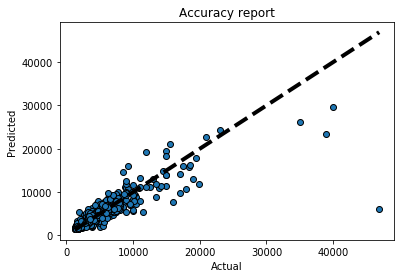

In [66]:
fig, ax = plt.subplots()
ax.scatter(test_df['rent'], bettergbr1.predict(test_df[features]), edgecolors=(0, 0, 0))
ax.plot([test_df['rent'].min(), test_df['rent'].max()], [test_df['rent'].min(), test_df['rent'].max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Accuracy report")
plt.show()

##  Regression Tree Model
From definition, decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.
Thus, in our case when we do the regression tree model, we actually use the decision tree classifer.

Train the regression tree model using default paramater

In [67]:
regtreemo = DecisionTreeRegressor(
    random_state=1, 
    max_depth=None,
    min_samples_leaf=1,
    max_features=None,
    max_leaf_nodes=None )

regtreemo.fit(train_df[features], train_df['rent'])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [68]:
get_cv_results(regtreemo)

(1784304.045467068, 307724.8507966775)

Train the regression tree model using Hyperparameters that we found, so that we can compare the results among different models better.

In [71]:
newregtreemo = DecisionTreeRegressor(
    random_state=1,
    max_depth=5,
    min_samples_leaf=6 )

newregtreemo.fit(train_df[features], train_df['rent'])

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=6,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [72]:
get_cv_results(newregtreemo)

(1560286.5382077775, 217774.82075975797)

As we can see, the regression tree model that uses the Hyperparameters does have better result.
But Gradient Boosting Regression still has the best result.

In [73]:
for feature,score in zip(features,newregtreemo.feature_importances_):
    print(feature, ' ', score)

bedrooms   0.004548823381066806
bathrooms   0.11734825780916851
size_sqft   0.6102817404345603
addr_lat   0.0
addr_lon   0.0
floor_count   0.0011509411321644757
year_built   0.0013179992866569205
min_to_subway   0.0
has_doorman   0.0
has_elevator   0.0
has_fireplace   0.0
has_dishwasher   0.0
is_furnished   0.0
has_gym   0.004362319958019443
allows_pets   0.0
has_washer_dryer   0.0020619724079841794
has_garage   0.0
has_roofdeck   0.0
has_concierge   0.0
has_pool   0.0
has_garden   0.0
has_childrens_playroom   0.0
no_fee   0.005122870357211396
floornumber   0.0030736720183509878
zip_average_income   0.17967545974968172
zip_unemployment_rate   0.0011406691267707113
neighborhood_population   0.0
ave_sale_price   0.0067173262797833935
estimated_rental_value   0.06319794805858121
Brooklyn   0.0
Manhattan   0.0
Queens   0.0
Bronx   0.0
Staten Island   0.0


### Learning Curve
We can use the Learning Curves methods provided in lecture 8

In [74]:
hp_values = range(1,50,2)
all_mu = []
all_sigma = []

for m in hp_values:

    dtree=DecisionTreeRegressor(
        random_state=1, 
        max_depth=m,
        min_samples_leaf=m,
    )

    mu, sigma = get_cv_results(dtree)
    all_mu.append(mu)
    all_sigma.append(sigma)
    
    print(m, mu, sigma)

1 4572785.645320359 445004.0887028914
3 2131275.8205047417 373358.7257241667
5 1564491.366883862 222282.10967542822
7 1468139.6035186667 268546.29228719167
9 1469873.7952830386 239850.41674270257
11 1386676.248651358 237384.0628583098
13 1402462.954857372 253339.55765092178
15 1346029.5685074665 264143.20932462276
17 1394834.8961980105 270527.13358506537
19 1397980.7033980575 257551.17628524895
21 1440011.5096156546 341482.44915712834
23 1459635.4964225094 355653.68920203485
25 1524333.7948864761 376467.07655902556
27 1511533.83376324 386956.5958300964
29 1457323.0414233475 348460.98396993714
31 1501776.5903524642 364676.7889701957
33 1620336.3882063979 336836.3183985473
35 1583549.2168568554 306208.7042190424
37 1590158.7750940374 309442.9770524444
39 1605758.6871501326 306926.54803492926
41 1614915.5590912506 317832.15879258723
43 1617953.1615027797 339046.36835281877
45 1596635.1015452903 341643.09703326965
47 1576229.1001086987 376156.6264321279
49 1570877.3062404287 324955.2802192

Text(0.5, 0, 'Max Depth')

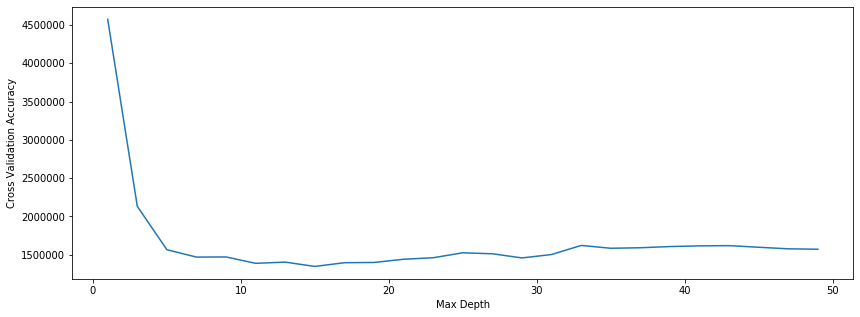

In [75]:
plt.figure(figsize=(14, 5))
plt.plot(hp_values, all_mu)
plt.ylabel('Cross Validation Accuracy')
plt.xlabel('Max Depth')

Text(0.5, 0, 'Max Depth')

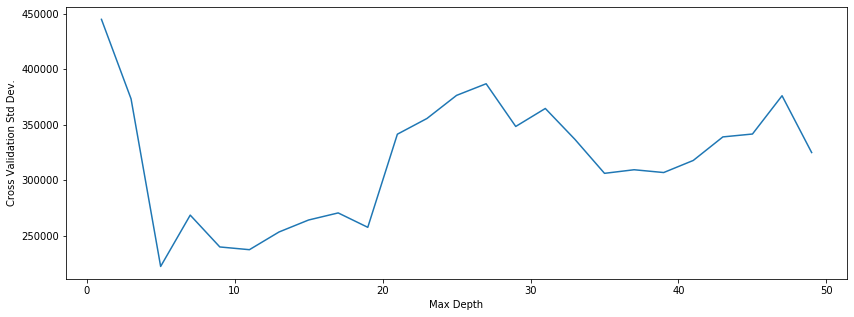

In [76]:
plt.figure(figsize=(14, 5))
plt.plot(hp_values, all_sigma)
plt.ylabel('Cross Validation Std Dev.')
plt.xlabel('Max Depth')

### Neural Network
Neural networks are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling or clustering raw input.(source:https://skymind.ai/wiki/neural-network)

In [95]:
scaler = StandardScaler()
X = scaler.fit_transform(train_df[features])
Y = train_df['rent'].values.reshape(-1,1)

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)

In [96]:
net = models.Sequential()
net.add(layers.Dense(64, input_dim=train_x.shape[1], kernel_regularizer=regularizers.l1(0.1), activation='relu'))
net.add(layers.Dropout(0.1))

net.add(layers.Dense(64, kernel_regularizer=regularizers.l1(0.1), activation='relu'))
net.add(layers.Dropout(0.1))

net.add(layers.Dense(128, kernel_regularizer=regularizers.l1(0.1), activation='relu'))
net.add(layers.Dropout(0.1))

net.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.1), activation='relu'))
net.add(layers.Dropout(0.1))

net.add(layers.Dense(1, activation='linear'))

net.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

In [79]:
net.fit(train_x, train_y, epochs=70, batch_size=64, validation_split = 0.1)




Train on 7876 samples, validate on 876 samples
Epoch 1/70





7876/7876 [==============================] - 3s 329us/step - loss: 11829207.2040 - mean_squared_error: 11828820.4126 - val_loss: 2130444.6190 - val_mean_squared_error: 2130029.5611
Epoch 2/70
7876/7876 [==============================] - 1s 149us/step - loss: 2350000.6582 - mean_squared_error: 2349589.2066 - val_loss: 1755715.8961 - val_mean_squared_error: 1755310.1909
Epoch 3/70
7876/7876 [==============================] - 1s 141us/step - loss: 2015616.7596 - mean_squared_error: 2015212.4194 - val_loss: 1442819.1824 - val_mean_squared_error: 1442414.6541
Epoch 4/70
7876/7876 [==============================] - 1s 116us/step - loss: 1975210.6644 - mean_squared_error: 1974811.2618 - val_loss: 1494961.3088 - val_mean_squared_error: 1494566.3393
Epoch 5/70
7876/7876 [==============================] - 1s 140us/step - loss: 1816561.0058 - mean_squared_error: 1816166.8983 - val_loss: 1321333.3422 - val_mean_squared_error: 132093

Epoch 36/70
7876/7876 [==============================] - 2s 202us/step - loss: 1146500.0708 - mean_squared_error: 1146076.5827 - val_loss: 899807.0328 - val_mean_squared_error: 899382.5611
Epoch 37/70
7876/7876 [==============================] - 1s 152us/step - loss: 1126617.8661 - mean_squared_error: 1126191.7033 - val_loss: 894117.4659 - val_mean_squared_error: 893687.8961
Epoch 38/70
7876/7876 [==============================] - 1s 139us/step - loss: 1181866.0003 - mean_squared_error: 1181436.1825 - val_loss: 944077.1691 - val_mean_squared_error: 943646.1050
Epoch 39/70
7876/7876 [==============================] - 1s 143us/step - loss: 1117878.8682 - mean_squared_error: 1117446.7094 - val_loss: 1028308.6694 - val_mean_squared_error: 1027877.1251
Epoch 40/70
7876/7876 [==============================] - 1s 119us/step - loss: 1074759.1611 - mean_squared_error: 1074323.9926 - val_loss: 961382.3729 - val_mean_squared_error: 960950.3789
Epoch 41/70
7876/7876 [==============================

In [80]:
mean_squared_error(test_y, net.predict(test_x))

1591015.5925490716

**Although the DL Neural Network seems to provide a better result on mean squared errors but it is really unstable** 

we have ran few test run on it, and each time it gives different results range from 953411.6171418771 to around 2,000,000.
Therefore, we might still choose Gradient Boosting Regression as the most suitable model, since it provides a overall better result.

# Model summary

In [97]:
print('Random Forest Regression: ', get_cv_results(rforest))
print('Gradient Boosting Regression: ', get_cv_results(gbrdemo))
print('Multiple Regression: ', get_cv_results(mul_reg))
print('Decision Tree Regression: ', get_cv_results(newregtreemo))
print('Neural Network Regression: ', mean_squared_error(test_y, net.predict(test_x)))

Random Forest Regression:  (1053460.6931887527, 228018.6363507963)
Gradient Boosting Regression:  (927079.4423014012, 164981.1004248631)
Multiple Regression:  (2124417.9780780375, 424060.54235046916)
Decision Tree Regression:  (1560286.5382077775, 217774.82075975797)
Neural Network Regression:  20128963.897158097


Before we move on to preduce our final predicted output for test2 and test3, we can also check how well is the performance of our model by creating a new column in our test1 set to store the predictions for test1, and then calcuate the error percentage with the actual rent value, thus we can see in what cases our model is doing great or bad.

In [120]:
gbrfortesting = GradientBoostingRegressor(
        n_estimators=120,
        max_depth=5,
        learning_rate=0.15,
        min_samples_leaf=6
    )
gbrfortesting.fit(test_df[features], test_df['rent'])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.15, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=120,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [128]:
test_performance_df = test_df
test_performance_df['predictions'] = gbrfortesting.predict(test_df[features])

In [129]:
test_performance_df = test_performance_df.loc[:, ['rent','predictions']]

Now we got the predictions line next to the actual rent, we can move on to calculate the error percentage of them, and sort it by the error to check what is the best case, then we sort it reversely to check the worst case

In [134]:
test_performance_df['predicted_error'] = abs( test_performance_df['rent'] - test_performance_df['predictions']) / test_performance_df['rent']
test_performance_df.sort_values(by=['predicted_error']).head(10)

,rent,predictions,predicted_error
rental_id,,,
7430833,5565,5565.232661,0.000042
7484308,1900,1899.702275,0.000157
7465147,3799,3799.712141,0.000187
7440091,2300,2299.514594,0.000211
7523548,3100,3100.681049,0.000220
7486420,2575,2575.636067,0.000247
7524397,2500,2499.350195,0.000260
7473694,1780,1779.510036,0.000275
7507138,3208,3208.946266,0.000295


In [135]:
test_performance_df.sort_values(by=['predicted_error'], ascending=False).head(10)

,rent,predictions,predicted_error
rental_id,,,
7464925,6897,13933.520479,1.020229
7445302,2000,3548.947047,0.774474
7474246,2000,3336.906624,0.668453
7509964,1700,2559.137765,0.505375
7433743,3691,5387.367547,0.459596
7439857,2600,3789.012131,0.457312
7446871,2800,3974.044889,0.419302
7454614,1580,2240.749067,0.418196
7460626,2400,3364.392473,0.401830


As we can see that rental_id of 7430833 has the best predicted result and rental_id of 7464925 has a really bad result

The two places are
- 7430833: #7C 240 EAST 27 STREET, NEW YORK, 10016 (https://streeteasy.com/property/7815532-parc-east-7c)
- 7464925: 1204 120 WEST 21 STREET, NEW YORK, 10011 (https://streeteasy.com/property/1321506-21-chelsea-1204)

### After explored 5 different regression models, we decided to use gradient boosting regression model to predict test2

In [98]:
output = pd.DataFrame(np.array(test2_df.index), columns=['rental_id'])

In [99]:
output['predictions'] = bettergbr1.predict(test2_df[features])

In [100]:
output.head(10)

,rental_id,predictions
0,7428577,2018.136263
1,7454944,2156.497120
2,7473595,2563.137531
3,7490488,2659.592657
4,7460896,3582.309121
5,7479988,2622.059261
6,7496308,3492.898431
7,7468621,2976.873219
8,7430797,3422.830981
9,7440397,4162.271001


In [101]:
output.to_csv('test2_prediction.csv')

# Prediction for test3

In [102]:
scaler = StandardScaler()
train_x = scaler.fit_transform(train_df[features])
train_y = train_df['rent'].values.reshape(-1,1)

bettergbr1 = GradientBoostingRegressor(
        n_estimators=120,
        max_depth=5,
        learning_rate=0.15,
        min_samples_leaf=6
    )
bettergbr1.fit(train_x, train_y)

D:\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.15, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=120,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [103]:
test_x = scaler.fit_transform(test3_df[features])

output = pd.DataFrame(np.array(test3_df.index), columns=['rental_id'])
output['predictions'] = bettergbr1.predict(test_x)
output.to_csv('test3_prediction.csv')

In [104]:
output.head(10)

,rental_id,predictions
0,7455565,4212.052640
1,7473295,2133.588111
2,7459804,3295.365104
3,7456330,2277.347136
4,7443595,3442.757603
5,7502623,2066.332923
6,7459171,4220.040506
7,7447600,1642.313233
8,7505254,3516.369924
9,7454620,2503.861059
